K-means Clustering

- K 개의 클러스터(군집)로 클러스터링을 하는 알고리즘
- 장점:
  첫 번째, 알고리즘이 단순하고, 속도가 빠릅니다.
  두 번째, 알고리즘을 여러 영역으로 확장이 용이합니다. 마지막으로 비지도 학습을 하는 알고리즘이기 때문에 주어진 데이터에 대한 사전 정보 없이 클러스터링이 가능합니다.

- 단점:
  첫 번째, 최적의 K 값을 찾기 위해서는 알고리즘을 여러 번 돌려 합니다.
  두 번째, 클러스터(군집)이 이산적이라는 가정을 가지고 만들어진 알고리즘이기 때문에 클러스터가 겹치거나 중첩되는 경우를 허용하지 않습니다.
  마지막으로 클러스터의 반지름을 줄여나가는 형태로 알고리즘을 작동하기 때문에 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 클러스터링이 잘되지 않습니다.
  




K-means Clustering 알고리즘의 군집(Clustering) 방법

- 0 단계 : 임의의 중심점(centroid) 선택
- 1 단계 : 각 데이터 포인트에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 군집 할당
- 2 단계 : 만들어진 군집에 새로운 중심점을 계산(중심점은 군집 내부 데이터 포인트 좌표들의 평균)
- 3 단계 : 각 클러스터의 변화가 없을 때까지 1단계와 2단계 반복


최적의 K를 찾는 방법

- 첫 번째는 K의 값을 늘려보면서 찾아보는 방법입니다. 이 방법은 연구자가 직접 눈으로 군집을 확인하기 때문에 연구자가 원하는 결과를 도출하는 데에는 효과

- 두 번째는 킨크의 스크리 도표를 사용하는 방법(Elbow Method)
  그래프에서 팔의 팔꿈치 부분에 해당하는 값이 최적의 K 값을 의미(즉, interia(관성)가 감소하는 정도가 낮아지는 부분을 의미)









In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# 2개의 주성분으로 축소. 2차원으로 데이터 변환
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca = PCA(2)
iris_pca = pca.fit_transform(iris_std)

1. 군집화(Clustering)

In [4]:
from sklearn.cluster import KMeans
KMeans().get_params()
# n_clusters : 군집화할 개수, 즉 군집 중심점의 갯수
# init : 초기 군집 중심점의 좌표를 설정하는 방식을 결정
# max_iter : 최대 반복 횟수, 모든 데이터의 중심점 이동이 없으면 종료

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [5]:
kmeans = KMeans(n_clusters=3, random_state=2023, n_init='auto')
kmeans.fit(iris_std)        # 비지도 학습이므로 y값을 제공하지 않음

KMeans(n_clusters=3, n_init='auto', random_state=2023)

In [6]:
# 학습 결과
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [7]:
# numbering은 임의로 부여
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([52, 50, 48]))

In [12]:
# 군집 중심값_라벨 0부터 2까지의 중심값을 표현. 시각화할때 유용함.
kmeans.cluster_centers_

array([[-0.06881714, -0.89339955,  0.34522179,  0.28439302],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13140499,  0.07903422,  0.98537152,  0.99908828]])

2. 시각화

In [8]:
df = pd.DataFrame(iris_pca, columns=['PC1','PC2'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head(54).tail()

,PC1,PC2,target,cluster
49,-2.203833,0.009216,0,1
50,1.101781,0.862972,1,2
51,0.731337,0.594615,1,2
52,1.240979,0.616298,1,2
53,0.407483,-1.754404,1,0


In [9]:
# 데이터 분포
df.groupby(['target','cluster'])[['PC1']].count()

PC1
target cluster     
0      1         50
1      0         38
       2         12
2      0         14
       2         36

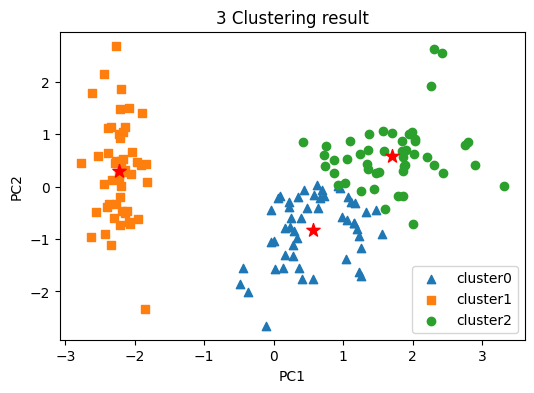

In [10]:
markers = ['^','s','o']
plt.figure(figsize=(6,4))
for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
    plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title('3 Clustering result')
plt.show()

3. Original Data vs. Clustering result

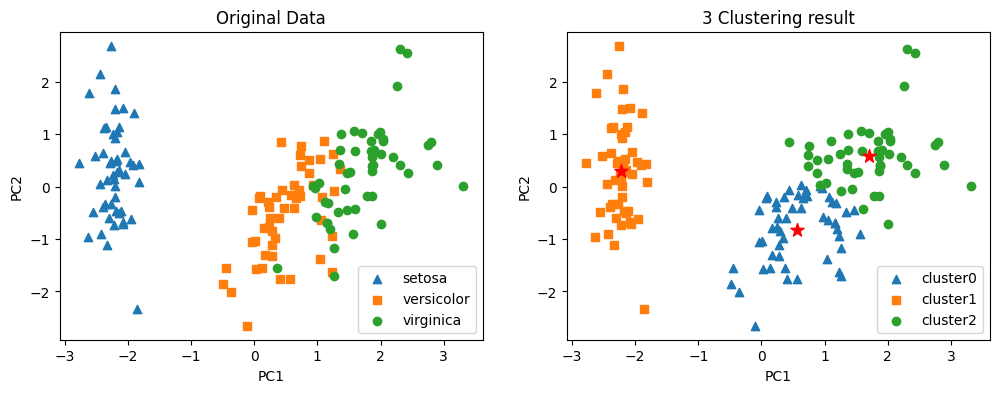

In [11]:
plt.figure(figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if column == 'target':
            plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)
    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    title = 'Original Data' if column=='target' else '3 Clustering result'
    plt.title(title)
plt.show()

꽃잎의 넓이와 길이, 2개의 특성만 사용
('petal length','petal width')하여 군집화

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# feature_names의 (cm)삭제.
cols = [each[:-5] for each in iris.feature_names]
cols


['sepal length', 'sepal width', 'petal length', 'petal width']

In [15]:
iris_df = pd.DataFrame(iris.data, columns = cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# 2개의 특성만 사용.
feature = iris_df[['petal length','petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
# 군집화
model = KMeans(n_clusters = 3)
model.fit(feature)

KMeans(n_clusters=3)

In [18]:
# 결과
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
#  군집 중심값
model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [21]:
#  시각화를 위한 정리
# 예측값을 데이터 프레임으로 만들고 feature 데이터 프레임과 concat
predict = pd.DataFrame(model.predict(feature), columns =['cluster'])
feature = pd.concat([feature, predict], axis =1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


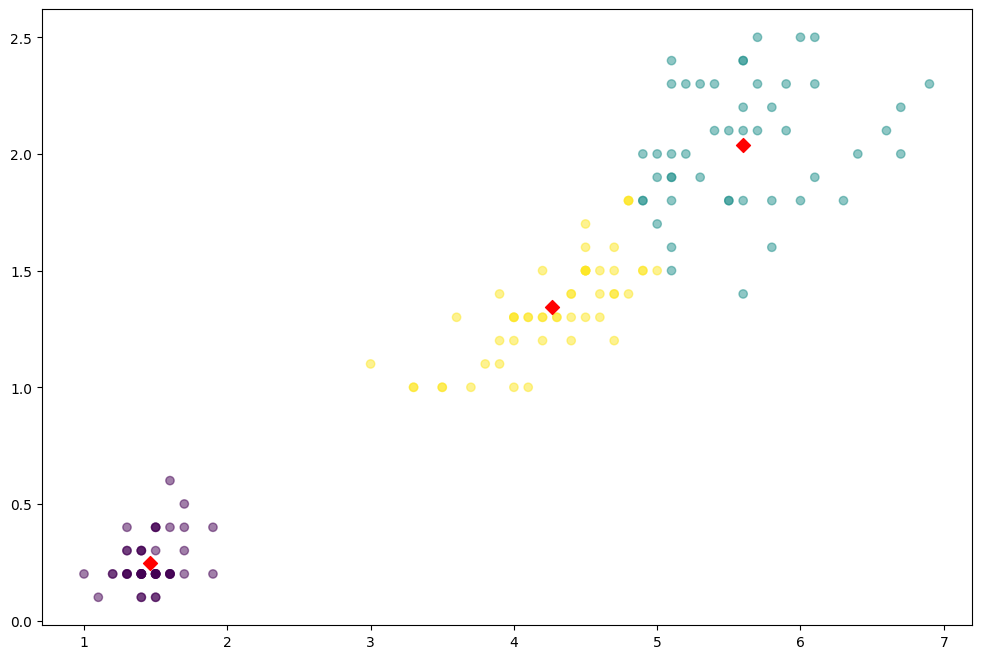

In [22]:
#  시각화
# 2개의 특성을 3개로 군집화 시키고, 각 군집의 중심을 빨간점으로 표시
centers = pd.DataFrame(model.cluster_centers_, columns=['petal length', 'petal width'])
center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize =(12,8))
plt.scatter(feature['petal length'], feature['petal width'], c = feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker ='D', c='r')
plt.show()

Make Blobs

- Make Blobs : 군집화 연습을 위한 데이터 생성기
- n_samples : 생성되는 샘플의 수
- n_features : 샘플이 가지는 특성의 수
- centers : 군집화되는 라벨
- cluter_std : 군집의 표준편차

1. Make Blobs

In [23]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples= 200, n_features=2, centers=3, cluster_std= 0.8, random_state= 0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts= True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


2. 데이터 정리

In [29]:
# Make Blobs로 만든 데이터를 데이터 프레임화 시킴
cluster_df = pd.DataFrame(data = X, columns=['ft1','ft2'])
cluster_df['target'] = y
cluster_df.head()

,ft1,ft2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


3. 군집화

In [30]:
# Kmeans를 사용하여 예측함.
# 실제 target과 예측과 label을 비교하는 데이터프레임 생성
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 200, random_state = 13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels
cluster_df.head()

,ft1,ft2,target,kmeans_label
0,-1.692427,3.622025,2,2
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,2
4,1.214861,5.364896,0,0


4. 시각화

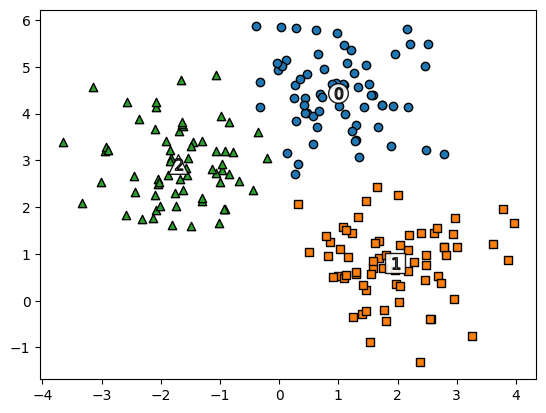

In [31]:
# 예측한 군집의 모형
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ft1'], y=label_cluster['ft2'], edgecolors='k', marker=markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s=200, color = 'white', alpha = 0.9, edgecolors = 'k', marker=markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s=70, color = 'white', alpha = 0.9, edgecolors = 'k', marker='$%d$' % label)
plt.show()

5. 결과 확인

In [33]:
cluster_df.groupby('target')['kmeans_label'].value_counts()
# target 0을 kmeans_label 0으로 66개, 2로 1개 즉, target0을 kmeans_label 0으로 군집,
# target 1을 kmeans_label 1으로 모두 군집화
# target 2을 kmeans_label 2로 65개, 1개는 1로 군집화
# target의 0,1,2를 맞추는것이 아닌, 0,1,2를 제대로 군집화시키는지를 봐야함

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64

군집 평가

1. 군집 결과의 평가
- 분류기는 평가 기준을 가지고 있지만, 군집은 그렇지 않을때가 많음
- 군집 결과를 평가하기 위해 실루엣 분석을 많이 활용함

2. 실루엣 분석

- 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타냄
- 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있는지 확인
- 군집화가 잘 되어 있을 수록 개별 군집은 비슷한 정도의 여유 공간을 가지고 있음
- 실루엣 계수 : 개별 데이터가 가지는 군집화 지표

- 실루엣 분석의 그래프가 균일한 칼 모양을 가지고 있으면 군집화가 잘 된것.


In [34]:
# iris 데이터의 4개 특성 모두 사용하여 3개의 군집으로 군집화
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(iris.data, columns= feature_names)
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, random_state = 0).fit(iris_df)


In [35]:
# 군집 결과 정리
iris_df['cluster']= kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [36]:
# 군집 결가 평가 - silhouette score는 집단이 멀리 떨어질수록 1로 나옴
from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print(f'avg_vale : {avg_value}')
print(f'silhouette_samples() return값의 shape : {score_values.shape}')

avg_vale : 0.5528190123564095
silhouette_samples() return값의 shape : (150,)


In [41]:
iris_std = StandardScaler().fit_transform(iris.data)

In [43]:
# 실루엣 계수(StandardScaler().fit_transform(iris.data))
sil_samples = silhouette_samples(iris_std, iris_df['cluster'])
iris_df['실루엣 계수'] = sil_samples
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,실루엣 계수
0,5.1,3.5,1.4,0.2,1,0.733190
1,4.9,3.0,1.4,0.2,1,0.577838
2,4.7,3.2,1.3,0.2,1,0.682010
3,4.6,3.1,1.5,0.2,1,0.628022
4,5.0,3.6,1.4,0.2,1,0.726932


In [44]:
#  cluster 별 실루엣 계수 평균
iris_df.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.335792
1    0.637704
2    0.364340
Name: 실루엣 계수, dtype: float64

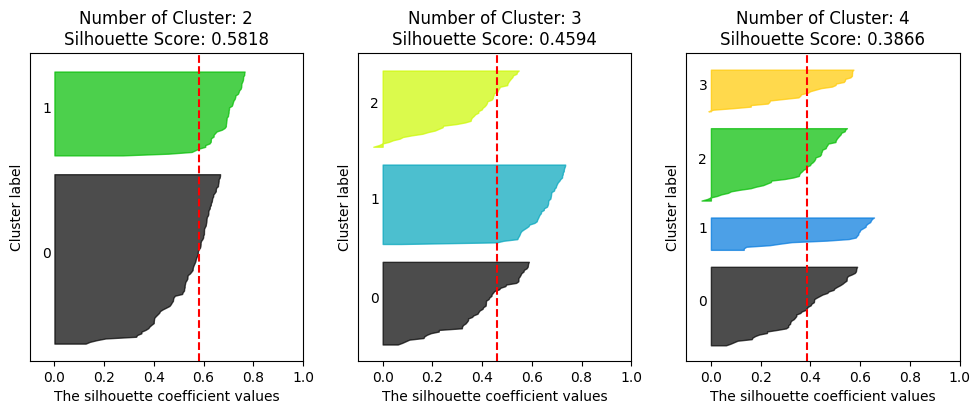

In [45]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4], iris_std)
# n_cluster의 갯수가 늘어날수록 실루엣 그래프가 칼 모양을 하고 있다.

In [49]:
# 실루엣 계수(iris.data)
sil_samples = silhouette_samples(iris.data, iris_df['cluster'])
iris_df['실루엣 계수'] = sil_samples
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,실루엣 계수
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [50]:
iris_df.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: 실루엣 계수, dtype: float64

클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화

In [46]:
# 실루엣 시각화
# 여러개의 클러스터링 개수를 list로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import math
    # 입력값으로 클러스터링 개수들을 리스트로 받아서 각 개수별로 클러스터링을 적용하고 실루엣 개수구함
    n_cols = len(cluster_lists)
    # plt.subplots()로 리스트레 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    # 리스트에 기재된 클러스러팅 개수들을 차례로 iteration  수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        # kmeans 클러스러팅수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 개수별로 fill_betweenx()형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0,
                                   ith_cluster_sil_values, facecolor=color,
                                   edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

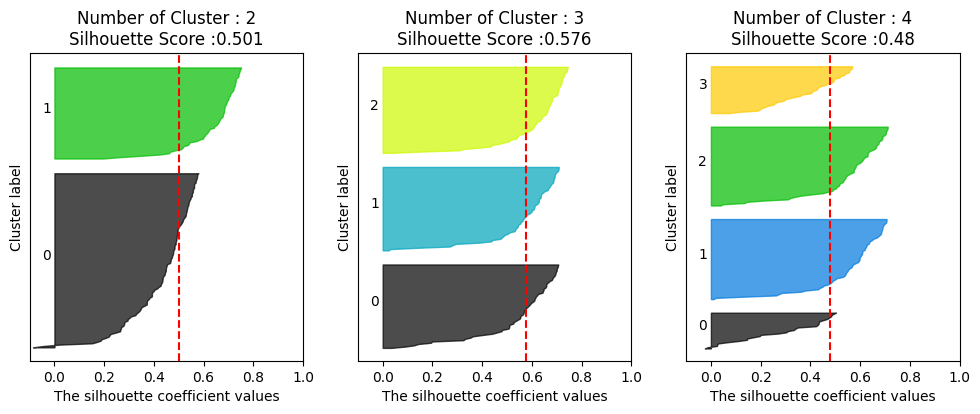

In [51]:
# make_blobs() 함수를 통해 4개 군집 중심의 500개 2차원 데이터 셋을 만들고
# 이를 K-budrbsdmfh 군집화할 때 2개, 3개, 4개, 5개 중 최적의 군집 개수를 시각화로 알아보자.
X, y = make_blobs(n_samples= 200, n_features=2, centers=3, cluster_std= 0.8, random_state= 0)
# cluster 개수가 2,3,4개 일때의 클러스터별 실루엣 계수 평균값 시각화
visualize_silhouette([2,3,4], X)

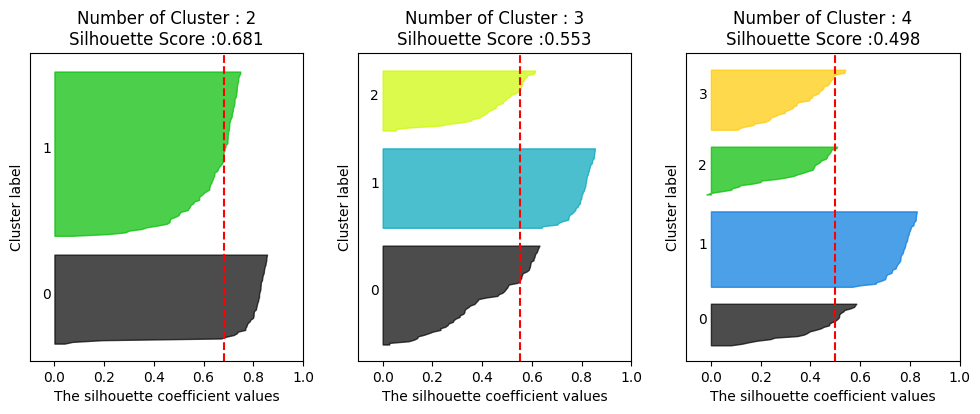

In [52]:
# iris 데이터를 이용한 최적의 군집 개수
visualize_silhouette([2,3,4], iris.data)

***실루엣 분석의 장점
- 클러스터링이 수행된 후 실제 구분된 클러스터에 따라 실루엣 계수를 구하기 때문에, 클러스터링 알고리즘에 영향을 받지 않는다.
- 적절한 클러스터 개수를 정하거나 더 나은 클러스터링 기법을 선택하는 기준으로 삼을 수 있다.
- 클러스터링 결과 값을 시각화할 수 있다.

***실루엣 분석의 단점
- 데이터 양이 많아질수록 수행 시간이 오래 걸린다.
(만일 100개의 데이터 포인트가 있다면 99개의 다른 데이터 포인트들과 거리를 구해 실루엣 계수를 구해야 하고, 이런 동일한 연산을 100번 수행해야 한다.)

- 전체 데이터 포인트의 실루엣 계수 평균값만으로 클러스터링 결과를 판단할 수 없으며 개별 클러스터의 평균값도 함께 고려해야 한다.
